Reference: https://towardsdatascience.com/implementing-yolo-on-a-custom-dataset-20101473ce53

In [7]:
!pip3 install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 66kB/s 
     |████████████████████████████████| 3.2MB 24.7MB/s 
     |████████████████████████████████| 491kB 31.7MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [1]:
!git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.


In [113]:
!wget https://pjreddie.com/media/files/yolov2-tiny.weights -O /content/yolov2-tiny.weights

--2020-06-18 14:01:18--  https://pjreddie.com/media/files/yolov2-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44948600 (43M) [application/octet-stream]
Saving to: ‘/content/yolov2-tiny.weights’

/content/yolov2-tin 100%[===================>]  42.87M   152KB/s    in 4m 13s  

2020-06-18 14:05:34 (173 KB/s) - ‘/content/yolov2-tiny.weights’ saved [44948600/44948600]



In [116]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2-tiny.cfg -O /content/yolov2-tiny.cfg

--2020-06-18 14:07:50--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2-tiny.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488 (1.5K) [text/plain]
Saving to: ‘/content/yolov2-tiny.cfg’

/content/yolov2-tin 100%[===================>]   1.45K  --.-KB/s    in 0s      

2020-06-18 14:07:50 (19.0 MB/s) - ‘/content/yolov2-tiny.cfg’ saved [1488/1488]



In [2]:
%cd /content/darkflow
!pip3 install .

/content/darkflow
Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=816542 sha256=8b7bf9d08e0bb1ef542ede304eefde61cde2993cded024497d48453e378607ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-a27732vp/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [1]:
!pip3 install tflearn --upgrade

     |████████████████████████████████| 102kB 2.1MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=7a08302c89c1eb47c87855316d445fabdad72eeed60216ac2777fd9e81b7a944
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
%cd /content/darkflow

/content/darkflow


In [9]:
!ls /content

darkflow  sample_data  yolov2.cfg  yolov2.cfg.1  yolov2.weights


In [80]:
options = {
 'model': '/content/yolov2-tiny.cfg',
 'load': '/content/yolov2-tiny.weights',
 'threshold': 0.3
}
tfnet = TFNet(options)

Parsing /content/yolov2.cfg
Loading /content/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.016008853912353516s


/usr/local/lib/python3.6/dist-packages/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use /content/yolov2.cfg instead
  cfg_path, FLAGS.model))


AssertionError: ignored

In [12]:
# read the color image and covert to RGB
img = cv2.imread('sample_img/sample_dog.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# use YOLO to predict the image
result = tfnet.return_predict(img)
result

[{'bottomright': {'x': 551, 'y': 463},
  'confidence': 0.8053032,
  'label': 'bicycle',
  'topleft': {'x': 84, 'y': 115}},
 {'bottomright': {'x': 698, 'y': 168},
  'confidence': 0.8214264,
  'label': 'truck',
  'topleft': {'x': 461, 'y': 82}},
 {'bottomright': {'x': 326, 'y': 535},
  'confidence': 0.8229169,
  'label': 'dog',
  'topleft': {'x': 130, 'y': 215}}]

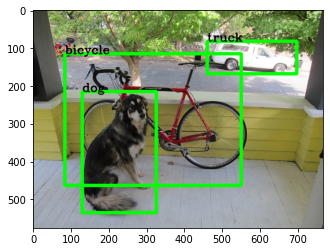

In [13]:
# pull out some info from the results
for i in range(0, len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
# add the box and label and display it
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
    plt.imshow(img)
plt.show()

<h3>Retrain</h3>

In [14]:
%cd /content
!git clone https://github.com/experiencor/kangaroo

/content
Cloning into 'kangaroo'...
remote: Enumerating objects: 334, done.
remote: Total 334 (delta 0), reused 0 (delta 0), pack-reused 334
Receiving objects: 100% (334/334), 18.39 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [17]:
!ls /content/kangaroo

annots	images	README.md


In [18]:
cat /content/darkflow/labels.txt

aeroplane
bicycle
bird
boat

In [8]:
%%writefile /content/labels/labels.txt 
kangaroo

Writing /content/labels/labels.txt


In [9]:
%mv /content/labels/labels.txt /content/darkflow/labels.txt

We update the model in the .cfg file. We need to update the number of classes and the filters in the last convolution layer in the ,cfg file.

No. of filters= (5 + no. of classes)*5

In [32]:
%mkdir /content/cfg/

In [17]:
%%writefile /content/cfg/yolo.cfg 
[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch=64
subdivisions=2
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=16
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=512
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=1

[convolutional]
batch_normalize=1
filters=1024
size=3
stride=1
pad=1
activation=leaky

###########

[convolutional]
batch_normalize=1
size=3
stride=1
pad=1
filters=512
activation=leaky

[convolutional]
size=1
stride=1
pad=1
filters=30
activation=linear

[region]
anchors =  0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828
bias_match=1
classes=1
coords=4
num=5
softmax=1
jitter=.2
rescore=0

object_scale=5
noobject_scale=1
class_scale=1
coord_scale=1

absolute=1
thresh = .6
random=1

Writing /content/cfg/yolo.cfg


In [18]:
%mv /content/cfg/yolo.cfg /content/darkflow/cfg/yolov2-tiny.cfg

In [19]:
options = {"model": "cfg/yolov2-tiny.cfg", 
           "load": "/content/yolov2-tiny.weights",
           "batch": 2,
           "epoch": 5,
           "train": True,
           "annotation": "/content/kangaroo/annots/",
           "dataset": "/content/kangaroo/images/"}

In [20]:
%cd /content/darkflow
from darkflow.net.build import TFNet
tfnet = TFNet(options)

/content/darkflow
Parsing ./cfg/yolov2-tiny.cfg
Parsing cfg/yolov2-tiny.cfg
Loading /content/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.005042076110839844s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | co

**Note**: The byte difference issue: I solved it by just substracting the found value (in your case 180357512) to the expected value (in your case 64701556). Let Assume the result is "X".
Now open your file ./darkflow/utils/loader.py and find the line 121. Then you will see a variable "self.offset" with a certain value assigned (16 or 20). Let suppose that value equals "Y".
Upadte the value of self.offset=Y+X

In [26]:
!mkdir ckpt

In [27]:
tfnet.train()


cfg/yolov2-tiny.cfg parsing /content/kangaroo/annots/
Parsing for ['kangaroo'] 
[====================>]100%  00153.xml
Statistics:
kangaroo: 266
Dataset size: 164
Dataset of 164 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 2
	Epoch number  : 5
	Backup every  : 2000
step 1 - loss 101.20442199707031 - moving ave loss 101.20442199707031
step 2 - loss 102.1051025390625 - moving ave loss 101.29449005126953
step 3 - loss 101.18228149414062 - moving ave loss 101.28326919555664
step 4 - loss 102.06282806396484 - moving ave loss 101.36122508239747
step 5 - loss 102.03795623779297 - moving ave loss 101.42889819793702
step 6 - loss 101.35072326660156 - moving ave loss 101.42108070480347
step 7 - loss 101.40074157714844 - moving ave loss 101.41904679203797
step 8 - loss 101.06713104248047 - moving ave loss 101.38385521708223
step 9 - loss 101.12806701660156 - moving ave loss 101.35827639703417
step 10 - loss 101.01298522949219 - moving ave loss 101.32374728027997
step

In [29]:
#test
options = {
 'model': 'cfg/yolov2-tiny.cfg',
 'load': 410,
 'threshold': 0.3,
 'backup':'ckpt/'
 
}
tfnet2 = TFNet(options)

Parsing cfg/yolov2-tiny.cfg
Loading None ...
Finished in 9.918212890625e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256

In [34]:
tfnet2.load_from_ckpt()

Loading from ckpt/yolov2-tiny-410
INFO:tensorflow:Restoring parameters from ckpt/yolov2-tiny-410


In [35]:
import cv2
original_img = cv2.imread("/content/kangaroo/images/00001.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[]
